In [61]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [62]:
import numpy as np
import pandas as pd

In [63]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [73]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [74]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [75]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [76]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [77]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [78]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

In [80]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [81]:
engine.execute('SELECT * FROM measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [92]:
# Design and perform a query to retrieve the last 12 months of precipitation data and plot the results
rain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-01-01').filter(Measurement.date <= '2016-12-31')

# Exploratory Climate Analysis

In [103]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(rain, columns = ['date', 'prcp'])
df.set_index('date')

# Sort the dataframe by date
df.sort_index



<bound method DataFrame.sort_index of             date  prcp
0     2016-01-01  0.00
1     2016-01-02  0.00
2     2016-01-03  0.00
3     2016-01-04  0.00
4     2016-01-05  0.00
...          ...   ...
2304  2016-12-27  0.14
2305  2016-12-28  0.14
2306  2016-12-29  1.03
2307  2016-12-30  2.37
2308  2016-12-31  0.90

[2309 rows x 2 columns]>

In [122]:
# Use Pandas Plotting with Matplotlib to plot the data
date = df["date"]
rain = df["prcp"]

fig, ax = plt.subplots()
plt.plot(date,rain)
ax.tick_params(labelbottom=False) 

plt.title("Rain Fall in Hawaii in 2016")
plt.xlabel("date")
plt.ylabel("precipitation")

Text(0, 0.5, 'precipitation')

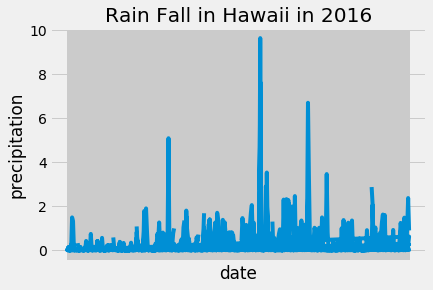

In [140]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain.describe()

count    2069.000000
mean        0.179845
std         0.506363
min         0.000000
25%         0.000000
50%         0.020000
75%         0.150000
max         9.640000
Name: prcp, dtype: float64

![precipitation](Images/precipitation.png)

![describe](Images/describe.png)

In [165]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement.station, Measurement.tobs, func.count(Measurement.station)).group_by(Measurement.station).\
stations.count()

9

In [176]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
df = pd.DataFrame(stations, columns = ['station', 'tobs', ''])
df.set_index('station')
df = df.rename(columns = {'': 'total'})
df.sort_values(by=['total'], ascending = False)


,station,tobs,total
6,USC00519281,70.0,2772
7,USC00519397,65.0,2724
1,USC00513117,67.0,2709
8,USC00519523,75.0,2669
3,USC00516128,73.0,2612
2,USC00514830,67.0,2202
0,USC00511918,66.0,1979
4,USC00517948,75.0,1372
5,USC00518838,72.0,511


SyntaxError: unexpected EOF while parsing (<ipython-input-195-443c0b6b1385>, line 1)

In [198]:
max_temp = session.query(func.max(Measurement.tobs).filter(Measurement.station == 'USC00519281')).scalar()
min_temp = session.query(func.min(Measurement.tobs).filter(Measurement.station == 'USC00519281')).scalar()
avg_temp = session.query(func.avg(Measurement.tobs).filter(Measurement.station == 'USC00519281')).scalar()


In [201]:
temps = [min_temp,max_temp,avg_temp]
temps

[54.0, 85.0, 71.66378066378067]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


[(54.0, 85.0, 71.66378066378067)]

In [276]:
rain = session.query( Measurement.tobs).filter(Measurement.station == 'USC00519281'). filter(Measurement.date >= '2016-01-01').filter(Measurement.date <= '2016-12-31')

In [279]:
rain.column_descriptions

[{'name': 'tobs',
  'type': FLOAT(),
  'aliased': False,
  'expr': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x2400bc66348>,
  'entity': sqlalchemy.ext.automap.measurement}]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024023622148>]],
      dtype=object)

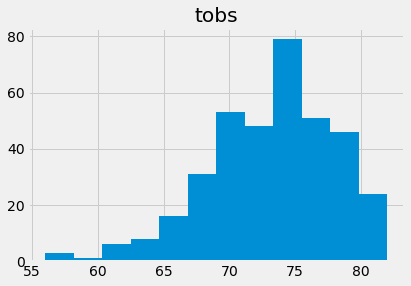

In [282]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df = pd.DataFrame(rain, columns = [ 'tobs'])
df.reset_index
df.hist(bins=12)

In [284]:
from flask import Flask, jsonify
#################################################
# Database Setup
#################################################
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save reference to the table
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

#################################################
# Flask Setup
#################################################
app = Flask(__name__)

#################################################
# Flask Routes
#################################################

@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"`/api/v1.0/<start>` and `/api/v1.0/<start>/<end>
    )


![precipitation](Images/station-histogram.png)

In [283]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


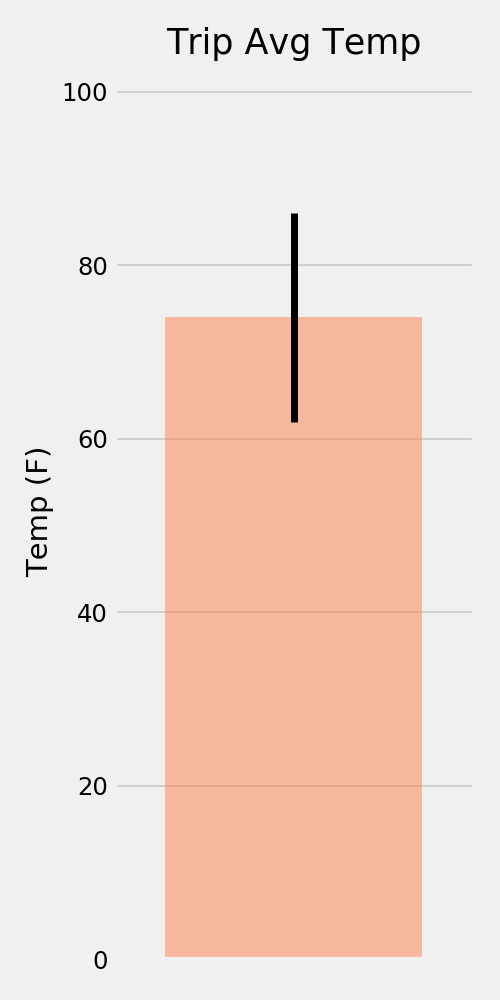

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


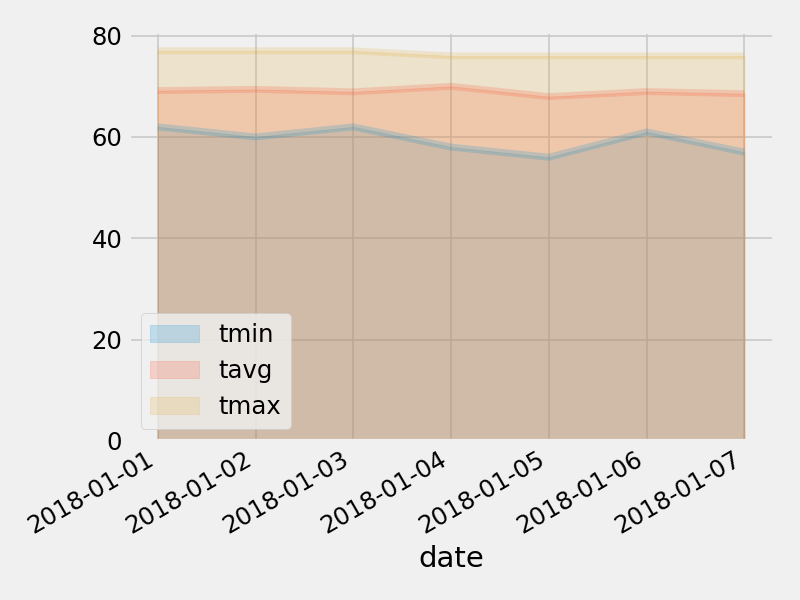

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
